In [1]:
#warnings :)
import warnings
warnings.filterwarnings('ignore')

import os
dir_Path = 'C:\\'
os.chdir(dir_Path)

In [2]:
import pandas as pd 
# Local directory
Reviewdata = pd.read_csv(r"C:\Users\V.PURNA CHANDANA\Downloads\text_emotion.csv")
#datacredit=https://data.world/crowdflower/sentiment-analysis-in-text

In [3]:
Reviewdata.shape

(40000, 4)

In [4]:
Reviewdata.head()

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...


In [5]:
Reviewdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 4 columns):
tweet_id     40000 non-null int64
sentiment    40000 non-null object
author       40000 non-null object
content      40000 non-null object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB


In [6]:
Reviewdata.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
tweet_id,40000.0,1.845184e+09,1.188579e+08,1.693956e+09,1.751431e+09,1.855443e+09,1.962781e+09,1.966441e+09


In [7]:
### Checking Missing values in the Data Set and printing the Percentage for Missing Values for Each Columns ###

count = Reviewdata.isnull().sum().sort_values(ascending=False)
percentage = ((Reviewdata.isnull().sum()/len(Reviewdata)*100)).sort_values(ascending=False)
missing_data = pd.concat([count, percentage], axis=1,
keys=['Count','Percentage'])

print('Count and percentage of missing values for the columns:')

missing_data

Count and percentage of missing values for the columns:


,Count,Percentage
content,0,0.0
author,0,0.0
sentiment,0,0.0
tweet_id,0,0.0


Percentage for default

neutral       21.60
worry         21.15
happiness     13.02
sadness       12.91
love           9.60
surprise       5.47
fun            4.44
relief         3.82
hate           3.31
empty          2.07
enthusiasm     1.90
boredom        0.45
anger          0.27
Name: sentiment, dtype: float64


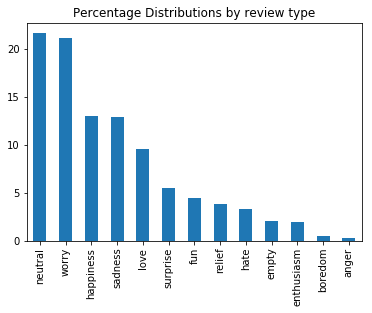

In [8]:
### Checking for the Distribution of Default ###
import matplotlib.pyplot as plt
%matplotlib inline
print('Percentage for default\n')
print(round(Reviewdata.sentiment.value_counts(normalize=True)*100,2))
round(Reviewdata.sentiment.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title('Percentage Distributions by review type')
plt.show()

In [9]:
# Apply first level cleaning
import re
import string

#This function converts to lower-case, removes square bracket, removes numbers and punctuation
def text_clean_1(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

cleaned1 = lambda x: text_clean_1(x)

In [10]:
#Let's take a look at the updated text
Reviewdata['cleaned_content'] = pd.DataFrame(Reviewdata.content.apply(cleaned1))
Reviewdata.head(15)

,tweet_id,sentiment,author,content,cleaned_content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...,tiffanylue i know i was listenin to bad habit...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...,layin n bed with a headache ughhhhwaitin on y...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...,funeral ceremonygloomy friday
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!,wants to hang out with friends soon
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...,dannycastillo we want to trade with someone wh...
5,1956968477,worry,xxxPEACHESxxx,Re-pinging @ghostridah14: why didn't you go to...,repinging why didnt you go to prom bc my bf d...
6,1956968487,sadness,ShansBee,"I should be sleep, but im not! thinking about ...",i should be sleep but im not thinking about an...
7,1956968636,worry,mcsleazy,Hmmm. http://www.djhero.com/ is down,hmmm httpwwwdjherocom is down
8,1956969035,sadness,nic0lepaula,@charviray Charlene my love. I miss you,charviray charlene my love i miss you
9,1956969172,sadness,Ingenue_Em,@kelcouch I'm sorry at least it's Friday?,kelcouch im sorry at least its friday


In [11]:
# Apply a second round of cleaning
def text_clean_2(text):
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

cleaned2 = lambda x: text_clean_2(x)

In [12]:
# Let's take a look at the updated text
Reviewdata['cleaned_content_new'] = pd.DataFrame(Reviewdata['cleaned_content'].apply(cleaned2))
Reviewdata.head(15)

,tweet_id,sentiment,author,content,cleaned_content,cleaned_content_new
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...,tiffanylue i know i was listenin to bad habit...,tiffanylue i know i was listenin to bad habit...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...,layin n bed with a headache ughhhhwaitin on y...,layin n bed with a headache ughhhhwaitin on y...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...,funeral ceremonygloomy friday,funeral ceremonygloomy friday
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!,wants to hang out with friends soon,wants to hang out with friends soon
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...,dannycastillo we want to trade with someone wh...,dannycastillo we want to trade with someone wh...
5,1956968477,worry,xxxPEACHESxxx,Re-pinging @ghostridah14: why didn't you go to...,repinging why didnt you go to prom bc my bf d...,repinging why didnt you go to prom bc my bf d...
6,1956968487,sadness,ShansBee,"I should be sleep, but im not! thinking about ...",i should be sleep but im not thinking about an...,i should be sleep but im not thinking about an...
7,1956968636,worry,mcsleazy,Hmmm. http://www.djhero.com/ is down,hmmm httpwwwdjherocom is down,hmmm httpwwwdjherocom is down
8,1956969035,sadness,nic0lepaula,@charviray Charlene my love. I miss you,charviray charlene my love i miss you,charviray charlene my love i miss you
9,1956969172,sadness,Ingenue_Em,@kelcouch I'm sorry at least it's Friday?,kelcouch im sorry at least its friday,kelcouch im sorry at least its friday


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
Independent_var = Reviewdata.cleaned_content_new
Dependent_var = Reviewdata.sentiment

IV_train, IV_test, DV_train, DV_test = train_test_split(Independent_var, Dependent_var, test_size = 0.1, random_state = 225)
print('IV_train :', len(IV_train))
print('IV_test  :', len(IV_test))
print('DV_train :', len(DV_train))
print('DV_test  :', len(DV_test))

IV_train : 36000
IV_test  : 4000
DV_train : 36000
DV_test  : 4000


In [14]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score

lr = LogisticRegression(random_state=1)

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
# initalise the vectoriser 
tvec = TfidfVectorizer()
# fit the training data on the model
tvec.fit(IV_train)

#transform training data into sparse matrix
IV_train_tvec = tvec.transform(IV_train)

# cross val score/ predict
tvec_score = cross_val_score(lr, IV_train_tvec, DV_train, cv=3)

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
# initalise the vectoriser 
cvec = CountVectorizer()
# fit the training data on the model
cvec.fit(IV_train)

#transform training data into sparse matrix
IV_train_cvec = cvec.transform(IV_train)

# cross val score/ predict
cvec_score = cross_val_score(lr, IV_train_cvec, DV_train, cv=3 )
IV_train_cvec

<36000x44737 sparse matrix of type '<class 'numpy.int64'>'
	with 413581 stored elements in Compressed Sparse Row format>

In [17]:
print ('Tfidf Vectorizer Score:', tvec_score.mean())
print ('Count Vectorizer Score:', cvec_score.mean())
acc_list = []
acc_list.append(cvec_score.mean())
acc_list.append(tvec_score.mean())

# DataFrame Accuracy 
acc_df = pd.DataFrame()
acc_df['params']= ['cvec', 'tvec']
acc_df['scores']= acc_list
acc_df

Tfidf Vectorizer Score: 0.34655632484099
Count Vectorizer Score: 0.3363058610002459


,params,scores
0,cvec,0.336306
1,tvec,0.346556


In [18]:
from sklearn.linear_model import LogisticRegression

tvec = TfidfVectorizer()
clf2 = LogisticRegression(solver = "saga")


from sklearn.pipeline import Pipeline

In [19]:
model = Pipeline([('vectorizer',tvec),('classifier',clf2)])

model.fit(IV_train, DV_train)


from sklearn.metrics import confusion_matrix

predictions = model.predict(IV_test)

confusion_matrix(predictions, DV_test)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   1,   4,   0,   2,   0,   0,   2,   0,   4],
       [  1,   0,   5,  18,  33, 208,  11,  84,  86,  28,  22,  19,  52],
       [  0,   0,   0,   0,   1,   0,  20,   1,   1,   0,  10,   0,   6],
       [  0,   1,   5,   4,   6,  43,   1, 166,  28,   8,  16,  18,  17],
       [  5,   8,  51,  36,  54, 150,  33,  86, 467,  50, 107,  79, 212],
       [  0,   0,   0,   0,   0,   2,   0,   0,   4,   5,   1,   2,   0],
       [  0,   1,   6,   8,   9,  13,  19,  22,  33,  11, 138,  16,  87],
       [  0,   0,   0,   0,   2,   6,   0,   3,   2,   1,   1,   6,   3],
       [  9,   9,  26,  31,  37, 100,  57,  57, 236,  36, 216,  80, 434]],
      dtype=int64)

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy : ", accuracy_score(predictions, DV_test))
print("Precision : ", precision_score(predictions, DV_test, average = 'weighted'))
print("Recall : ", recall_score(predictions, DV_test, average = 'weighted'))

Accuracy :  0.36125
Precision :  0.47208689506729307
Recall :  0.36125


In [21]:
example = ["ohh you are the best"]
result = model.predict(example)

print(result)

['love']
